# Diabetes prediction

The notebook contains several machine learning models that have been used on diabetes dataset. 
ML models used: logistic regression, K-nearest neighbors, decision trees, random forest, bagging, support vectores machines and XGBoost. 

Dataset source: https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('D:\Datasets\healthcare dataset\Healthcare_Diabetes.csv')
#df = df.set_index('Id')
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [4]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


<Axes: ylabel='Outcome'>

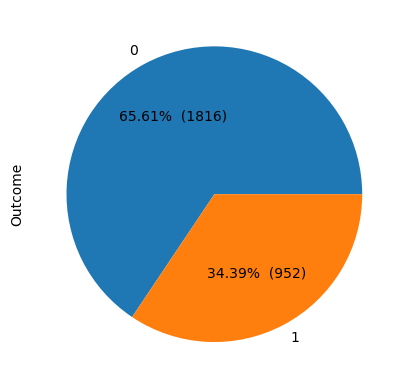

In [5]:
#let's see how many zeros and ones are there
values = df['Outcome']

def make_autopct(values):
    def my_autopct(pct):
        total = len(df['Outcome'])
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

df["Outcome"].value_counts().plot(kind="pie", autopct=make_autopct(values))

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

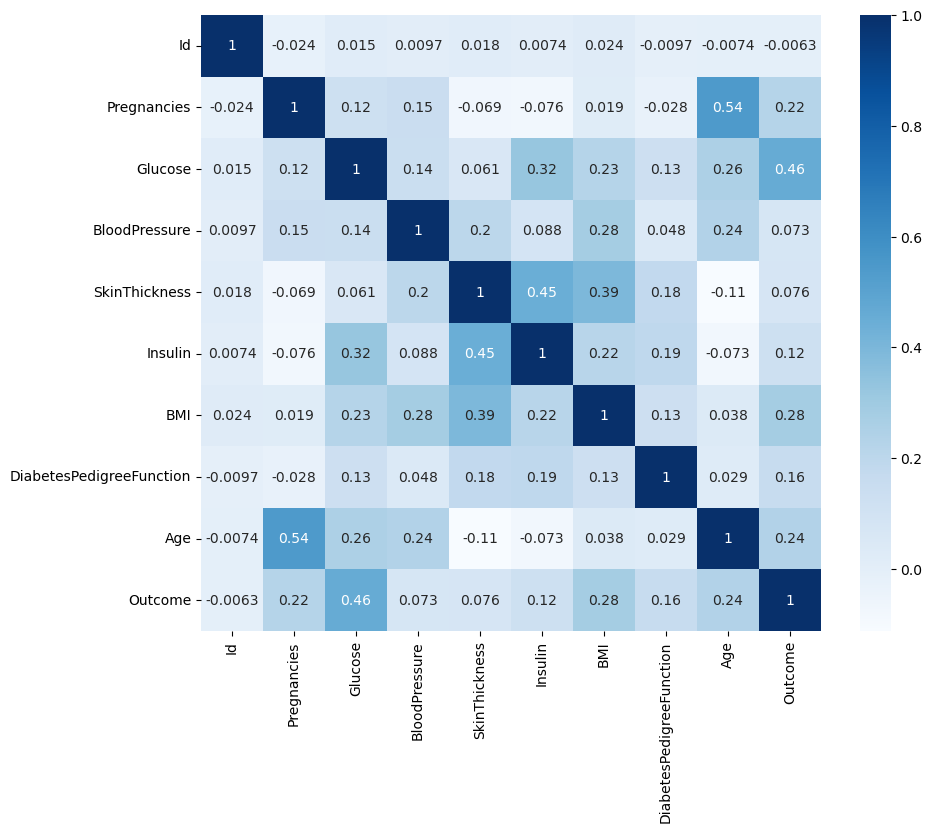

In [8]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

### Logistic regression

In [9]:
#splitting the data for X and y
X = df.drop(columns=['Outcome', 'Id'])
y = df['Outcome']

In [10]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()

In [12]:
lg_model = lg_model.fit(X_train, y_train)
y_pred = lg_model.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
lg_acc = round(accuracy_score(y_test, y_pred), 2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       562
           1       0.73      0.55      0.63       269

    accuracy                           0.79       831
   macro avg       0.77      0.73      0.74       831
weighted avg       0.78      0.79      0.78       831



C:\Users\menda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
#Standarizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
#logistic regression - scaled data
lg_model = lg_model.fit(X_train_scaled, y_train)

In [15]:
y_pred = lg_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       562
           1       0.73      0.55      0.63       269

    accuracy                           0.79       831
   macro avg       0.77      0.73      0.74       831
weighted avg       0.78      0.79      0.78       831



#### There is no need to scale the data for logistic regression. Both models give the same results. Let's try oversampling. 

In [16]:
df["Outcome"].value_counts()

0    1816
1     952
Name: Outcome, dtype: int64

In [17]:
#Oversampling the data
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
y_train.value_counts()

1    1297
0    1245
Name: Outcome, dtype: int64

In [18]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

C:\Users\menda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
y_pred = lg_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       571
           1       0.75      0.75      0.75       519

    accuracy                           0.76      1090
   macro avg       0.76      0.76      0.76      1090
weighted avg       0.76      0.76      0.76      1090



#### Removing outliers from the data

In [20]:
no_outliers = df
cols = no_outliers.drop(columns = ['Id', 'Glucose']).columns
cols

Index(['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
for i in cols:
    lower_limit = df[i].quantile(0.25)
    upper_limit = df[i].quantile(0.75)
    no_outliers[i] = no_outliers[i].clip(lower_limit, upper_limit)

In [22]:
#splitting the data for X and y
X = no_outliers.drop(columns=['Outcome', 'Id'])
y = no_outliers['Outcome']

In [23]:
#splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [24]:
#Standarizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train_scaled, y_train)
y_pred = lg_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       562
           1       0.70      0.54      0.61       269

    accuracy                           0.78       831
   macro avg       0.75      0.71      0.73       831
weighted avg       0.77      0.78      0.77       831



In [26]:
#Oversampling the data and splitting the data
ros = RandomOverSampler()
X_os, y_os = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size = 0.3, random_state=42)
y_train.value_counts()

1    1297
0    1245
Name: Outcome, dtype: int64

In [27]:
#Standarizing the data
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [28]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)
y_pred = lg_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       571
           1       0.74      0.75      0.75       519

    accuracy                           0.76      1090
   macro avg       0.75      0.75      0.75      1090
weighted avg       0.76      0.76      0.76      1090



C:\Users\menda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Oversampling does not seem to improve the performance of the linear regression model

### K-nearest neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
X = df.drop(columns=['Outcome', 'Id'])
y = df['Outcome']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [32]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model = knn_model.fit(X_train, y_train)

In [33]:
y_pred = knn_model.predict(X_test)

KNN_acc = round(accuracy_score(y_test, y_pred), 2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       562
           1       0.76      0.79      0.78       269

    accuracy                           0.85       831
   macro avg       0.83      0.84      0.83       831
weighted avg       0.85      0.85      0.85       831



In [34]:
#K-nearest neighbors plus standarization

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model = knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       562
           1       0.72      0.72      0.72       269

    accuracy                           0.82       831
   macro avg       0.80      0.80      0.80       831
weighted avg       0.82      0.82      0.82       831



In [37]:
from sklearn.model_selection import GridSearchCV
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors' : np.arange(1, 15)}
knn_gscv = GridSearchCV(knn2, param_grid)
knn_gscv.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [38]:
print(knn_gscv.best_params_)
print('score:', knn_gscv.best_score_)

{'n_neighbors': 1}
score: 0.965414635445803


In [39]:
nums = np.arange(1,16)
results = []
for n in nums:
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model = knn_model.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred).round(2)
    results.append({n : acc})
results

[{1: 0.97},
 {2: 0.94},
 {3: 0.9},
 {4: 0.85},
 {5: 0.82},
 {6: 0.82},
 {7: 0.83},
 {8: 0.83},
 {9: 0.81},
 {10: 0.81},
 {11: 0.8},
 {12: 0.79},
 {13: 0.78},
 {14: 0.79},
 {15: 0.79}]

### Decision Tree

In [40]:
from sklearn import tree
dt_model = tree.DecisionTreeClassifier(max_depth = 7, max_features=8)
dt_model = dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

DT_acc = round(accuracy_score(y_test, y_pred), 2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       562
           1       0.81      0.80      0.80       269

    accuracy                           0.87       831
   macro avg       0.86      0.85      0.86       831
weighted avg       0.87      0.87      0.87       831



### Random Forest 

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 120, max_features= 3, max_depth = 7)
rf_model = rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

RF_acc = round(accuracy_score(y_test, y_pred), 2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       562
           1       0.88      0.88      0.88       269

    accuracy                           0.92       831
   macro avg       0.91      0.91      0.91       831
weighted avg       0.92      0.92      0.92       831



### Bagging

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [43]:
bagg_model = BaggingClassifier(n_estimators=10, random_state=14, bootstrap = False)
bagg_model = bagg_model.fit(X_train, y_train)
y_pred = bagg_model.predict(X_test)

bagg_acc = round(accuracy_score(y_test, y_pred), 2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       562
           1       0.96      0.96      0.96       269

    accuracy                           0.97       831
   macro avg       0.97      0.97      0.97       831
weighted avg       0.97      0.97      0.97       831



### Support Vector Machines

In [44]:
#linear
from sklearn.svm import SVC
X = df.drop(columns=['Outcome', 'Id'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
SVM_model = SVC(kernel ='linear', C=7)
SVM_model = SVM_model.fit(X_train, y_train)
y_pred = SVM_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       562
           1       0.68      0.56      0.61       269

    accuracy                           0.77       831
   macro avg       0.74      0.72      0.73       831
weighted avg       0.76      0.77      0.76       831



In [45]:
#polynomial
from sklearn.svm import SVC
X = df.drop(columns=['Outcome', 'Id'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
SVM_model = SVC(kernel ='poly', C=30, degree = 6)
SVM_model = SVM_model.fit(X_train, y_train)
y_pred = SVM_model.predict(X_test)

print(classification_report(y_test, y_pred))
SVC_acc = round(accuracy_score(y_test, y_pred), 2)

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       562
           1       0.80      0.54      0.65       269

    accuracy                           0.81       831
   macro avg       0.80      0.74      0.76       831
weighted avg       0.81      0.81      0.80       831



In [46]:
#RBF
X = df.drop(columns=['Outcome', 'Id'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
SVM_model = SVC(kernel ='rbf')
SVM_model = SVM_model.fit(X_train, y_train)
y_pred = SVM_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       562
           1       0.71      0.52      0.60       269

    accuracy                           0.78       831
   macro avg       0.75      0.71      0.72       831
weighted avg       0.77      0.78      0.77       831



In [47]:
#polynomial with oversampling
X = df.drop(columns=['Outcome', 'Id'])
y = df['Outcome']
ros = RandomOverSampler()
X_os, y_os = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size = 0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
SVM_model = SVC(kernel ='poly', C=50, degree = 3)
SVM_model = SVM_model.fit(X_train, y_train)
y_pred = SVM_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       571
           1       0.74      0.71      0.73       519

    accuracy                           0.74      1090
   macro avg       0.74      0.74      0.74      1090
weighted avg       0.74      0.74      0.74      1090



In [48]:
# ^not so good - oversampling does not help

### XGBClassifier and cross validation

In [49]:
from sklearn.model_selection import KFold 
import xgboost as xgb

In [50]:
X = df.drop(columns=['Outcome', 'Id']).values
y = df['Outcome'].values

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, test_index in kfold.split(X):   
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xgb_model = xgb.XGBClassifier(objective="binary:logistic")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
print(scores)

[0.98014440433213, 0.9909747292418772, 0.983754512635379, 0.9873417721518988, 0.9873417721518988]


In [51]:
XGBClassifier_acc = round(max(scores), 2)

### Summary

In [52]:
print(f'Logistic regression accuracy: {lg_acc}')
print(f'KNN accuracy: {KNN_acc}')
print(f'Decision tree accuracy: {DT_acc}')
print(f'Random forest accuracy: {RF_acc}')
print(f'Bagging accuracy: {bagg_acc}')
print(f'SVM accuracy: {SVC_acc}')
print(f'XGBClassifier accuracy: {XGBClassifier_acc}')

Logistic regression accuracy: 0.79
KNN accuracy: 0.85
Decision tree accuracy: 0.87
Random forest accuracy: 0.92
Bagging accuracy: 0.97
SVM accuracy: 0.81
XGBClassifier accuracy: 0.99
